In [1]:
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
data = "Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation   learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."
data

'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation   learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.'

In [27]:
sentences = data.split('.')
sentences = [sentence for sentence in sentences if sentence.strip()]

In [4]:
clean_sent = []
for sentence in sentences:
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    sentence = re.sub(r'(?:^| )\\w (?:$| )', ' ', sentence).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)

In [6]:
index_to_word = {}
word_to_index = {}

In [7]:
for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

In [8]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 100 
context_size = 2

In [9]:
contexts = []
targets = []

for sequence in sequences:
    for i in range(1, len(sequence) - 1):
        if i - context_size >= 0 and i + context_size < len(sequence):
            target = sequence[i]
            context = [sequence[i - context_size], sequence[i + context_size]]
            contexts.append(context)
            targets.append(target)

In [10]:
X = np.array(contexts)
Y = np.array(targets)

In [11]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size),  # Removed input_length
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
history = model.fit(X, Y, epochs=100, batch_size=32)


Epoch 1/100

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: 4.3184
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1978 - loss: 4.3002
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3054 - loss: 4.2842
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4482 - loss: 4.2661
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5678 - loss: 4.2474
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5305 - loss: 4.2300
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5561 - loss: 4.2093
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 4.1826
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4922 - loss: 4.1528
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4901 - loss: 4.1248
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4581 - loss: 4.0802
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4347 - loss: 4.

In [14]:
embeddings = model.get_weights()[0]

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

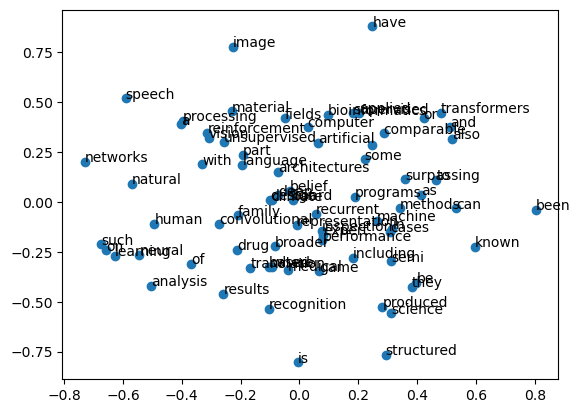

In [16]:
import matplotlib.pyplot as plt
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, word in enumerate(index_to_word.values()):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.show()

In [46]:
test_sentences = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

for sent in test_sentences:
    test_words = sent.split(" ")
    x_test = []
    for i in test_words:
        # Add a default index for unknown words (e.g., 0 for unknown)
        word_index = word_to_index.get(i, 0)
        x_test.append(word_index)
    
    # Convert the list to a NumPy array
    x_test = np.array([x_test])

    # Predict and display the result
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred), "\n\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= neural 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
pred  ['transformers', 'have', 'applied', 'to'] 
= results 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
pred  ['where', 'they', 'produced', 'results'] 
= have 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
pred  ['cases', 'surpassing', 'expert', 'performance'] 
= human 




In [22]:
# tp
"""
This code implements the Continuous Bag of Words (CBOW) model using TensorFlow and Keras. Here's a step-by-step explanation of the code:

1. Import Libraries:
NumPy: Used for handling arrays and matrix operations.
re: Used for regular expressions to clean the text data.
TensorFlow/Keras: For building and training the neural network model.
Tokenizer: A Keras utility to convert text into sequences of integers.

2. Data Preprocessing:
The data is a string describing Docker and its use in modern DevOps practices. It is split into sentences.
Each sentence is cleaned by removing special characters and converting the text to lowercase for consistency.

3. Text Cleaning:
Sentences are split using . (periods), and empty sentences are removed.
Special characters are replaced with spaces using regular expressions, and each sentence is made lowercase.

4. Tokenization:
Tokenizer is used to create a vocabulary from the cleaned sentences and to convert the words into sequences of integers.
The fit_on_texts function is used to build a word index, which assigns an integer to each unique word in the corpus.

5. Creating Word Lookup Dictionaries:
word_to_index: Maps each word to its corresponding index.
index_to_word: Maps each index to the corresponding word.

6. Context and Target Creation for CBOW:
The CBOW model predicts a target word based on the context (words surrounding it).
For each word in a sequence, a context is created from a window of words around it (defined by context_size).
The context words and the target word are stored in contexts and targets, respectively.

7. Model Architecture:
The CBOW model is implemented using Keras' Sequential API.
Embedding Layer: This layer maps each word to a dense vector (embedding). The size of the embedding vectors is defined by emb_size.
Lambda Layer: The context (a set of words) is represented by the mean of their embedding vectors, which is computed using tf.reduce_mean.
Dense Layers:
The first Dense layer has 256 neurons and a ReLU activation function.
The second Dense layer outputs a probability distribution over the vocabulary (softmax activation).
The model's output is a prediction of the target word (given the context words).

8. Model Compilation:
The model is compiled with:
Loss function: sparse_categorical_crossentropy is used since the target words are integers.
Optimizer: adam, which adapts the learning rate during training.
Metrics: accuracy, to measure the model's performance during training.

9. Model Training:
The model is trained on the contexts (input) and targets (output) for 100 epochs with a batch size of 32.

10. Visualizing Word Embeddings:
After training, the word embeddings (the weights of the Embedding layer) are reduced to two dimensions using PCA (Principal Component Analysis) to visualize them in a 2D space.
The words are then plotted, showing their positions in this 2D space.

11. Testing the Model:
A list of test sentences (test_sentences) is defined.
For each test sentence, the words are converted into their corresponding integer indices using the word_to_index dictionary.
The model predicts the target word based on the given context and prints the result.

12. Example Output:
For each test sentence, the model predicts a word that might fit as the target word based on the context (the surrounding words).
Issues and Possible Improvements:
The current context is fixed at size 2 (context_size = 2), so only a small context around each word is used. This may limit the model's ability to learn broader relationships.
The code doesn't handle edge cases well, such as sentences with fewer than context_size words.
The word_to_index dictionary is used for converting words to their corresponding index, but words not seen during training are mapped to 0. This is a simplistic approach to handling unknown words.
In summary, this code demonstrates how to implement the CBOW model for word embedding learning using Keras and TensorFlow, and it trains a model to predict the target word from its surrounding context.
"""

"\nThis code implements the Continuous Bag of Words (CBOW) model using TensorFlow and Keras. Here's a step-by-step explanation of the code:\n\n1. Import Libraries:\nNumPy: Used for handling arrays and matrix operations.\nre: Used for regular expressions to clean the text data.\nTensorFlow/Keras: For building and training the neural network model.\nTokenizer: A Keras utility to convert text into sequences of integers.\n\n2. Data Preprocessing:\nThe data is a string describing Docker and its use in modern DevOps practices. It is split into sentences.\nEach sentence is cleaned by removing special characters and converting the text to lowercase for consistency.\n\n3. Text Cleaning:\nSentences are split using . (periods), and empty sentences are removed.\nSpecial characters are replaced with spaces using regular expressions, and each sentence is made lowercase.\n\n4. Tokenization:\nTokenizer is used to create a vocabulary from the cleaned sentences and to convert the words into sequences of